In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed 
seed(42)
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsRegressor

import scikitplot as skplt

ModuleNotFoundError: ignored

In [10]:
#Importing 
df = pd.read_csv("/content/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,16,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [13]:
df.isna().sum()

name              35606
a                     0
e                     0
i                     0
om                    0
w                     1
q                     1
ad                    1
per_y                 1
data_arc              1
condition_code        1
n_obs_used            1
H                     1
neo                   1
pha                   1
diameter          17268
extent            54018
albedo            17288
rot_per           43632
GM                54021
BV                53015
UB                53057
IR                54033
spec_B            52562
spec_T            53057
G                 53918
moid                  1
class                 1
n                     1
per                   1
ma                    1
dtype: int64

In [14]:
for column in df.columns:
    print(column, df[column].isna().sum()/df.shape[0]) #returns the fraction of NAN values

name 0.6589676679066496
a 0.0
e 0.0
i 0.0
om 0.0
w 1.850720855773324e-05
q 1.850720855773324e-05
ad 1.850720855773324e-05
per_y 1.850720855773324e-05
data_arc 1.850720855773324e-05
condition_code 1.850720855773324e-05
n_obs_used 1.850720855773324e-05
H 1.850720855773324e-05
neo 1.850720855773324e-05
pha 1.850720855773324e-05
diameter 0.31958247737493756
extent 0.999722391871634
albedo 0.3199526215460922
rot_per 0.8075065237910166
GM 0.9997779134973072
BV 0.9811596616882275
UB 0.9819369644476523
IR 1.0
spec_B 0.9727758962115745
spec_T 0.9819369644476523
G 0.9978716710158607
moid 1.850720855773324e-05
class 1.850720855773324e-05
n 1.850720855773324e-05
per 1.850720855773324e-05
ma 1.850720855773324e-05


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54033 entries, 0 to 54032
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            18427 non-null  object 
 1   a               54033 non-null  float64
 2   e               54033 non-null  float64
 3   i               54033 non-null  float64
 4   om              54033 non-null  float64
 5   w               54032 non-null  float64
 6   q               54032 non-null  float64
 7   ad              54032 non-null  float64
 8   per_y           54032 non-null  float64
 9   data_arc        54032 non-null  float64
 10  condition_code  54032 non-null  float64
 11  n_obs_used      54032 non-null  float64
 12  H               54032 non-null  float64
 13  neo             54032 non-null  object 
 14  pha             54032 non-null  object 
 15  diameter        36765 non-null  object 
 16  extent          15 non-null     object 
 17  albedo          36745 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaeb3c06d0>,
      dtype=object)

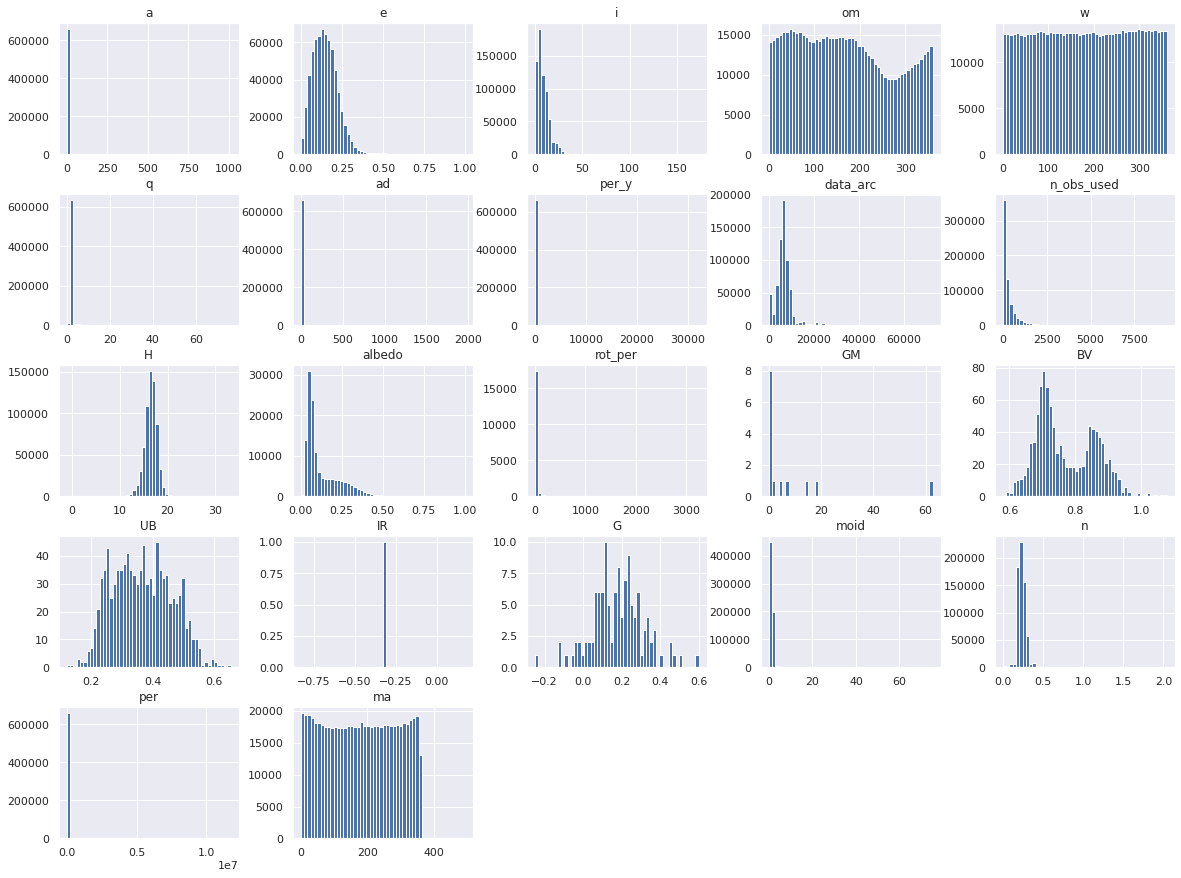

In [ ]:
df.hist(bins = 50, figsize = (20,15))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


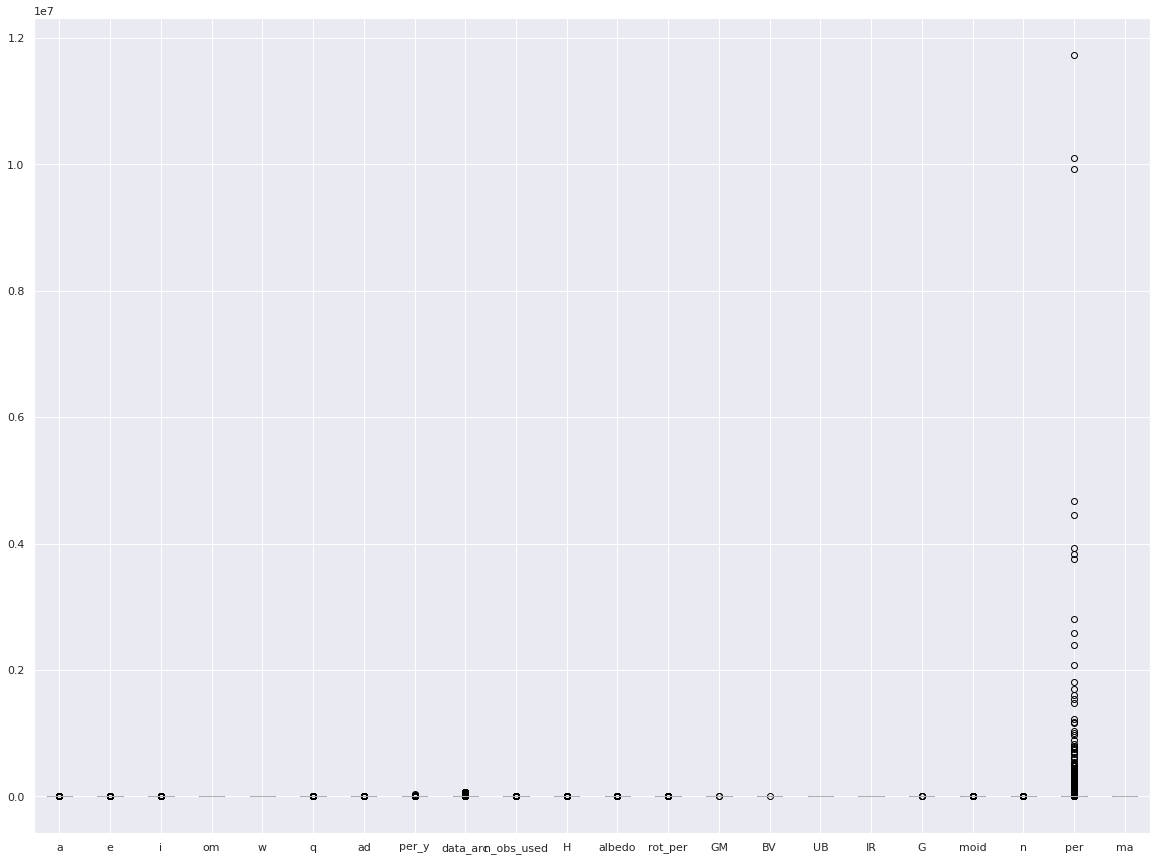

In [ ]:
df.boxplot(figsize = (20,15))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

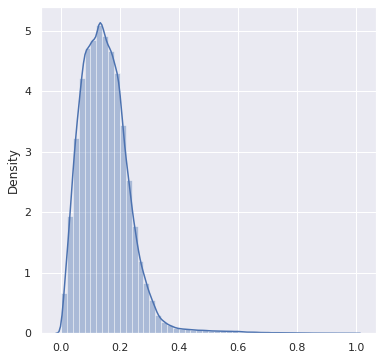

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df,x=df['e'])
plt.xlabel("Eccentricity")
plt.title("Distribution of eccentricity")
plt.show()

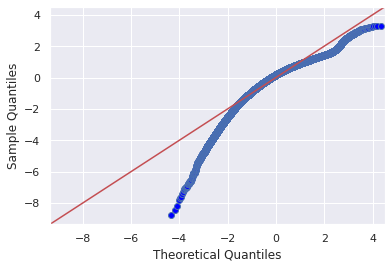

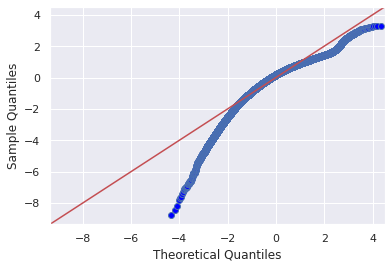

In [ ]:
import statsmodels.api as sm
e_log=np.log(df['e'])
sm.qqplot(e_log,line='45',fit=True)

We can see there is lot of deviation from straight line thus it doesn't follow log-normal distribution

Text(0.5, 1.0, 'Boxplot of eccentricity')

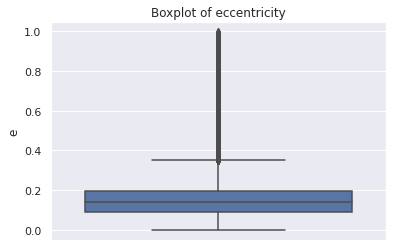

In [ ]:
sns.boxplot(data=df,y=df['e'])
plt.title("Boxplot of eccentricity")

In [ ]:
print("minimum value of eccentricity columns is {}".format(min(df['e'])))
print("50 percentile of eccentricity column is {}".format(np.percentile(df['e'],50)))
print("95 percentile of eccentricity column is {}".format(np.percentile(df['e'],95)))
print("99 percentile eccentricity column is {}".format(np.percentile(df['e'],99)))
print("maximum value of eccentricity column is {}".format(max(df['e'])))

minimum value of eccentricity columns is 0.0
50 percentile of eccentricity column is 0.141050634815973
95 percentile of eccentricity column is 0.2832844891495783
99 percentile eccentricity column is 0.43291017348099325
maximum value of eccentricity column is 0.9955121189939884


Distribution of eccentricity seems to be like of log normal distribution though it is not we confirmed it using Q-Q plot . It have some outliers points which can be confirmed seeing difference in 99 percentile and maximum value.

In [16]:
## Convert diameter To float
convertDict = {'diameter' : float}
df = df.astype(convertDict) 
## correlation
corr_matrix = df.corr()
corr_matrix.columns
corr_matrix['diameter'].sort_values(ascending = False)

diameter          1.000000
GM                0.896734
data_arc          0.511418
a                 0.415664
n_obs_used        0.400895
ad                0.393880
moid              0.391099
per               0.390680
per_y             0.390680
q                 0.387265
condition_code    0.222751
i                 0.146719
ma                0.015080
om                0.003197
w                 0.000601
rot_per          -0.007897
e                -0.011344
G                -0.102799
UB               -0.179859
albedo           -0.262920
n                -0.290020
BV               -0.305864
H                -0.700386
IR                     NaN
Name: diameter, dtype: float64

In [17]:
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df = df.drop(dropindexes, axis=0) 

In [18]:
print(df['neo'])

0        N
1        N
2        N
3        N
4        N
        ..
54022    N
54024    N
54025    N
54026    N
54029    N
Name: neo, Length: 36765, dtype: object


In [19]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code'],axis=1)


In [20]:
df.isna().sum()

a              0
e              0
i              0
om             0
w              0
q              0
ad             0
per_y          0
data_arc       0
n_obs_used     0
H              0
neo            0
pha            0
diameter       0
albedo        20
moid           0
class          0
n              0
per            0
ma             0
dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(df['neo'])
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
df['neo'] = onehot_encoder.fit_transform(integer_encoded)

print(df['neo'])

[0 0 0 ... 0 0 0]
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
54022    1.0
54024    1.0
54025    1.0
54026    1.0
54029    1.0
Name: neo, Length: 36765, dtype: float64


In [22]:
integer_encoded1 = label_encoder.fit_transform(df['pha'])
print(integer_encoded1)

integer_encoded1 = integer_encoded.reshape(len(integer_encoded1), 1)

df['pha'] = onehot_encoder.fit_transform(integer_encoded1)

print(df['pha'])

[0 0 0 ... 0 0 0]
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
54022    1.0
54024    1.0
54025    1.0
54026    1.0
54029    1.0
Name: pha, Length: 36765, dtype: float64


In [23]:
integer_encoded2 = label_encoder.fit_transform(df['class'])
print(integer_encoded2)

integer_encoded2 = integer_encoded.reshape(len(integer_encoded2), 1)

df['class'] = onehot_encoder.fit_transform(integer_encoded2)

print(df['class'])


[6 6 6 ... 6 6 6]
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
54022    1.0
54024    1.0
54025    1.0
54026    1.0
54029    1.0
Name: class, Length: 36765, dtype: float64


In [ ]:
#labelEnc = LabelEncoder()
#df['neo'] = labelEnc.fit_transform(df['neo'])
#df['pha'] = labelEnc.fit_transform(df['pha'])
#df['class'] = labelEnc.fit_transform(df['class'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


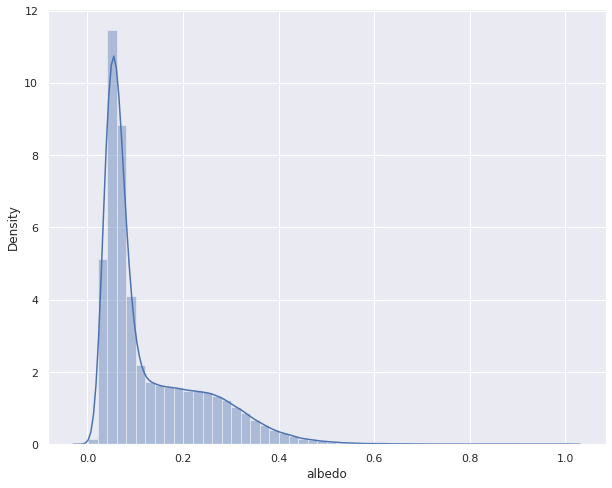

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.albedo)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


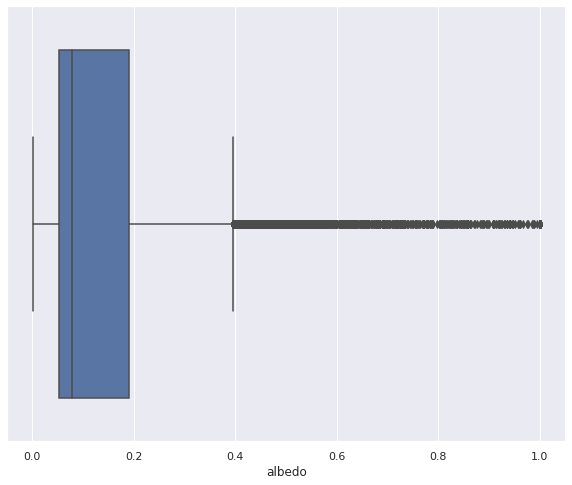

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.albedo)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


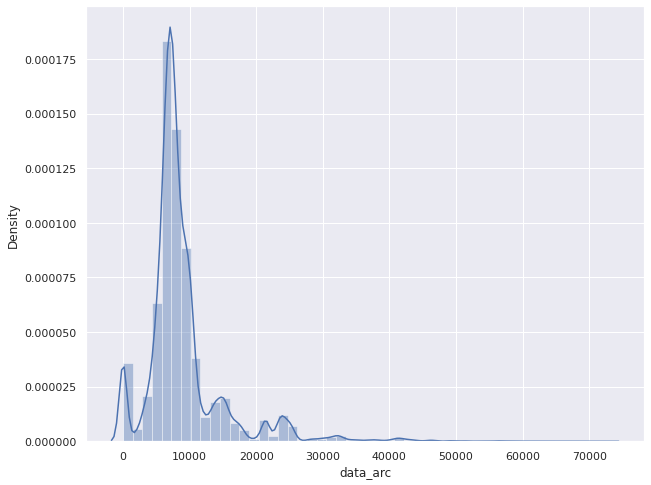

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.data_arc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


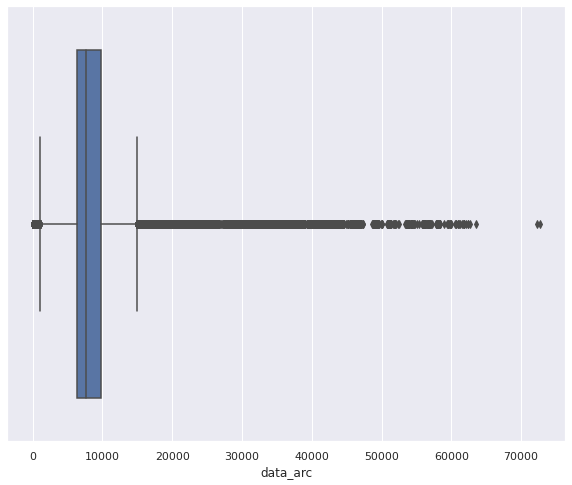

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.data_arc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


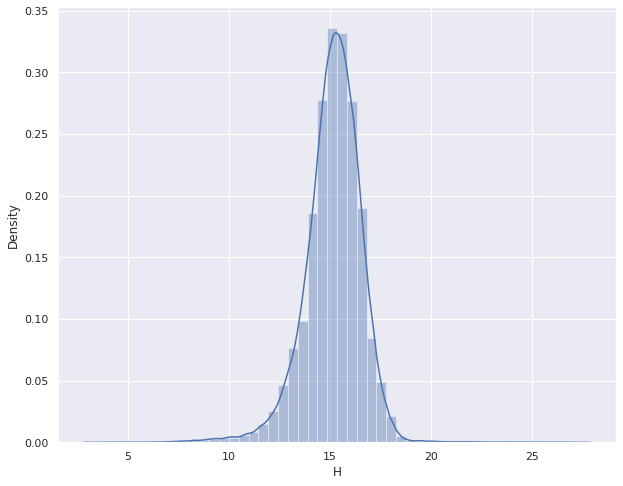

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.H)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


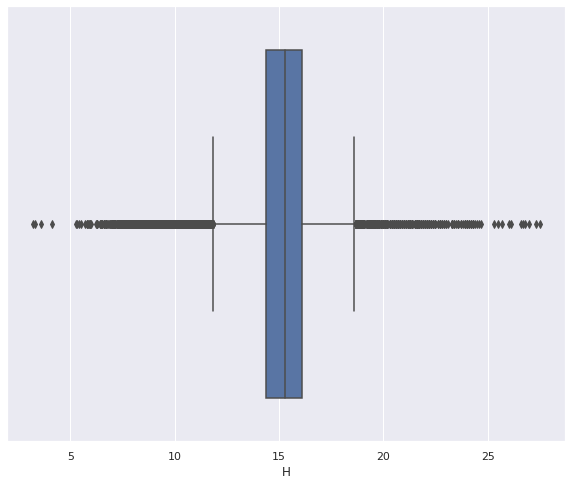

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.H)

In [24]:
df["H"] = df["H"].fillna(df["H"].mode()) 

In [ ]:
df.describe

<bound method NDFrame.describe of                a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
659816  3.097226  0.068528  14.696713  294.522659   80.136793  2.884979   
659837  2.685883  0.238680  13.908845  137.452434  244.066526  2.044816   
659956  3.099965  0.051104  17.378263  128.995915  300.876014  2.941543   
659988  3.200774  0.184514  25.700320  320.469109  311.967731  2.610186   
660262  3.106938  0.184132  15.488858  325.212294  101.152450  2.534852   

              ad     per_y  data_arc  n_obs_used      H  neo  pha

In [25]:
df = df.fillna(df.median()) #because the data is skewed

In [26]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002.0,3.34,1.0,1.0,939.400,0.0900,1.59478,1.0,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490.0,4.13,1.0,1.0,545.000,0.1010,1.23324,1.0,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104.0,5.33,1.0,1.0,246.596,0.2140,1.03454,1.0,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325.0,3.20,1.0,1.0,525.400,0.4228,1.13948,1.0,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916.0,6.85,1.0,1.0,106.699,0.2740,1.09589,1.0,0.238632,1508.600458,282.366289


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36765 entries, 0 to 54029
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           36765 non-null  float64
 1   e           36765 non-null  float64
 2   i           36765 non-null  float64
 3   om          36765 non-null  float64
 4   w           36765 non-null  float64
 5   q           36765 non-null  float64
 6   ad          36765 non-null  float64
 7   per_y       36765 non-null  float64
 8   data_arc    36765 non-null  float64
 9   n_obs_used  36765 non-null  float64
 10  H           36765 non-null  float64
 11  neo         36765 non-null  float64
 12  pha         36765 non-null  float64
 13  diameter    36765 non-null  float64
 14  albedo      36765 non-null  float64
 15  moid        36765 non-null  float64
 16  class       36765 non-null  float64
 17  n           36765 non-null  float64
 18  per         36765 non-null  float64
 19  ma          36765 non-nul

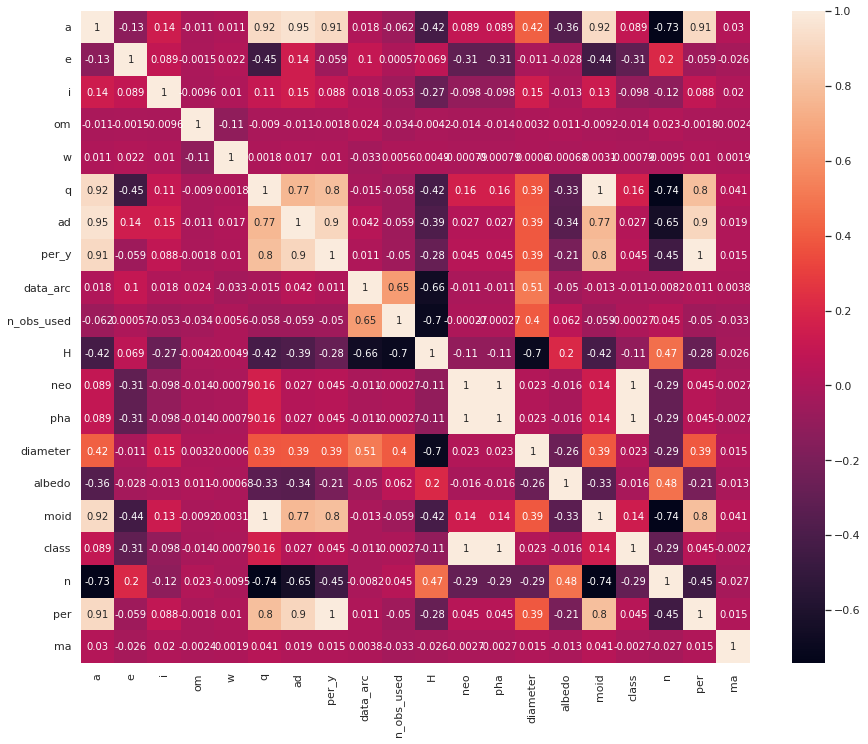

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.subplots(figsize=(15,12))
num_data = df.select_dtypes(include=numerics)
sns.heatmap(num_data.corr(),annot=True,annot_kws={'size':10})

Feature selection

In [29]:
df.drop('per_y', axis=1, inplace=True)
# per_y and per has exactly same correlation with every parameter

In [30]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

The chi-squired test to find best feature

In [68]:
# Load packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Create features and target
X = predictors
y = target
  
# Convert to categorical data by converting data to integers
#X = X.astype(int)

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

ValueError: ignored

Feature Importance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Separating the dependent and independent variables
y = df['diameter']
X = df.drop('diameter', axis = 1)
  
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn import utils
# define dataset
X = predictors
y = target
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y_transformed)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: ignored

Feature Engineering

I found an interesting formula on one of the NASA website(https://cneos.jpl.nasa.gov/tools/ast_size_est.html) to determine asteroid diameter using absolute magnitude(H) and geometric albedo(a)
d=10[3.1236−0.5log10(a)−0.2H]

In [31]:
#Function to estimate asteroid parameter 
import math
def est_diameter(a,h) :
  r=(3.1236-(0.5*math.log10(a))-(0.2*h))
  d=math.pow(10,r)
  return d
  

In [32]:
for index,value in X_train.iterrows() :
  a=value['albedo']
  h=value['H']
  X_train.at[index,'estimate_diameter']=est_diameter(a,h)

In [33]:
for index,value in X_test.iterrows() :
  a=value['albedo']
  h=value['H']
  X_test.at[index,'estimate_diameter']=est_diameter(a,h)

outliers

a                       AxesSubplot(0.125,0.816017;0.133621x0.0639831)
e                    AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
i                     AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
om                   AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
w                    AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
q                       AxesSubplot(0.125,0.739237;0.133621x0.0639831)
ad                   AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
data_arc              AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
n_obs_used           AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
H                    AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
neo                     AxesSubplot(0.125,0.662458;0.133621x0.0639831)
pha                  AxesSubplot(0.285345,0.662458;0.133621x0.0639831)
albedo                AxesSubplot(0.44569,0.662458;0.133621x0.0639831)
moid                 AxesSubplot(0.606034,0.662458;0.133621x0.0639831)
class 

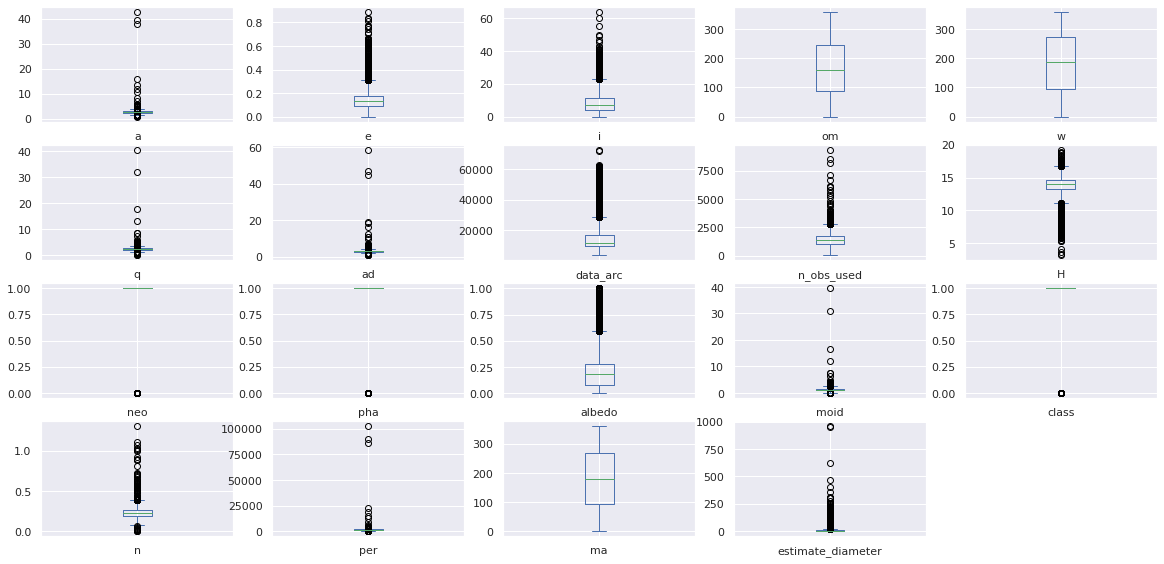

In [37]:
X_train.plot(kind="box",subplots=True,layout=(10,5),figsize=(20,25))

no outliers in om, w and ma

In [39]:
upper_limit = X_train['data_arc'].quantile(0.97)
lower_limit = X_train['data_arc'].quantile(0.03)
print(upper_limit,lower_limit)
X_train['data_arc'] = np.where(X_train['data_arc'] >= upper_limit,
        upper_limit, np.where(X_train['data_arc'] <= lower_limit,lower_limit,X_train['data_arc']))

37358.009999999995 7620.0


In [40]:
upper_limit = X_train['n'].quantile(0.97)
lower_limit = X_train['n'].quantile(0.03)
X_train['n'] = np.where(X_train['n'] >= upper_limit,
        upper_limit, np.where(X_train['n'] <= lower_limit,lower_limit,X_train['n']))

In [41]:
upper_limit = X_train['H'].quantile(0.97)
lower_limit = X_train['H'].quantile(0.03)
X_train['H'] = np.where(X_train['H'] >= upper_limit,
        upper_limit, np.where(X_train['H'] <= lower_limit,lower_limit,X_train['H']))

In [42]:
upper_limit = X_train['e'].quantile(0.97)
lower_limit = X_train['e'].quantile(0.03)
X_train['e'] = np.where(X_train['e'] >= upper_limit,
        upper_limit, np.where(X_train['e'] <= lower_limit,lower_limit,X_train['e']))

normalization

In [49]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

trying different regressions and ranking them according to their R2 score

In [50]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
algorithms = []
scores = []

LINEAR REGRESSION

In [51]:
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = score(Y_pred_lr)
announce(score_lr)

algorithms.append('LR')
scores.append(score_lr)

The R^2 score achieved using this regression is: 0.981


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


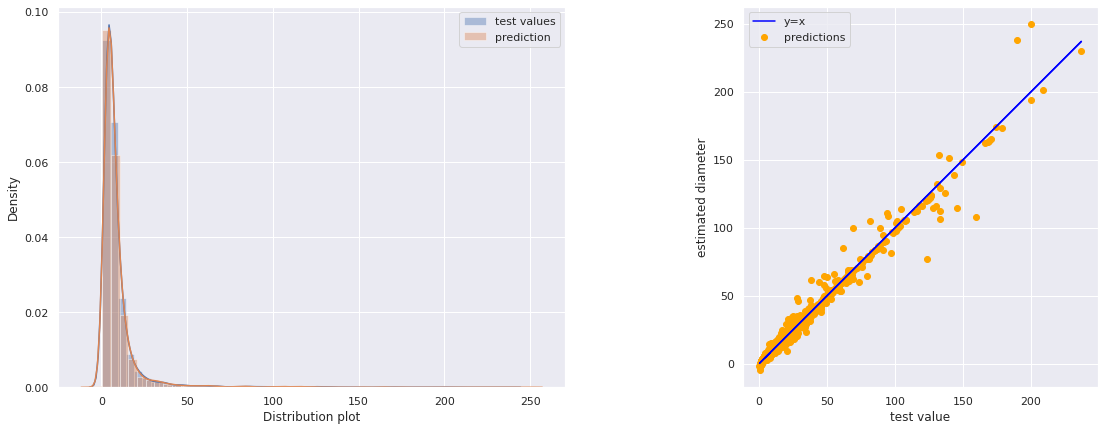

In [52]:
plot(Y_pred_lr)

k-Nearest Neighbours regression

In [53]:
### Defining the Model

from sklearn.neighbors import KNeighborsRegressor

##For weighted metric, more accurate but longer calculation
#weights = X_train_norm.corrwith(Y_train).abs()
#neigh = KNeighborsRegressor(n_neighbors=3, metric_params={'w' : weights.values}, metric='wminkowski')

neigh = KNeighborsRegressor(n_neighbors=3)

### Training
neigh.fit(X_train_norm,Y_train)

### Predicting 
Y_pred_neigh = neigh.predict(X_test_norm)

### Scoring
score_neigh=score(Y_pred_neigh)
announce(score_neigh)

algorithms.append('k-NN')
scores.append(score_neigh)

The R^2 score achieved using this regression is: 0.949


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


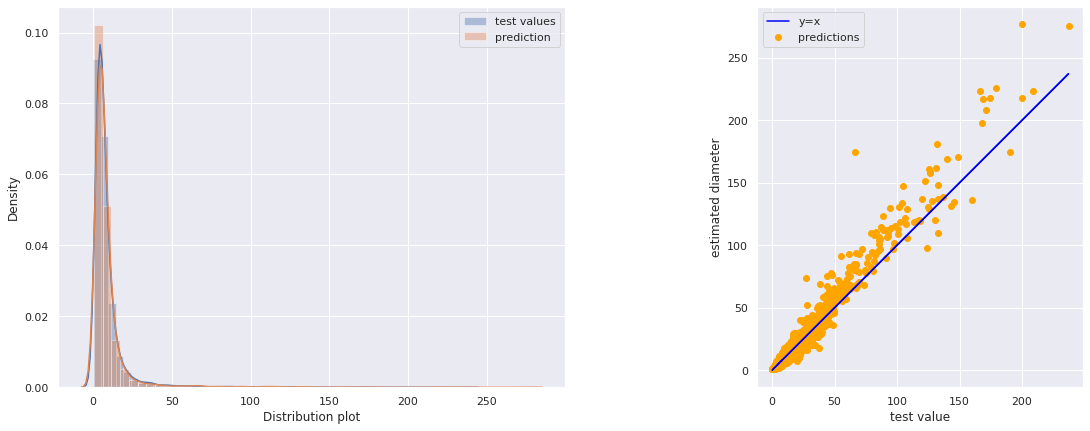

In [54]:
plot(Y_pred_neigh)

Random Forest Regressor

In [55]:
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=32, n_estimators=50)

### Training 
forest.fit(X_train_norm,np.ravel(Y_train))

###Predicting
Y_pred_forest = forest.predict(X_test_norm)

### Scoring
score_forest = score(Y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.948


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


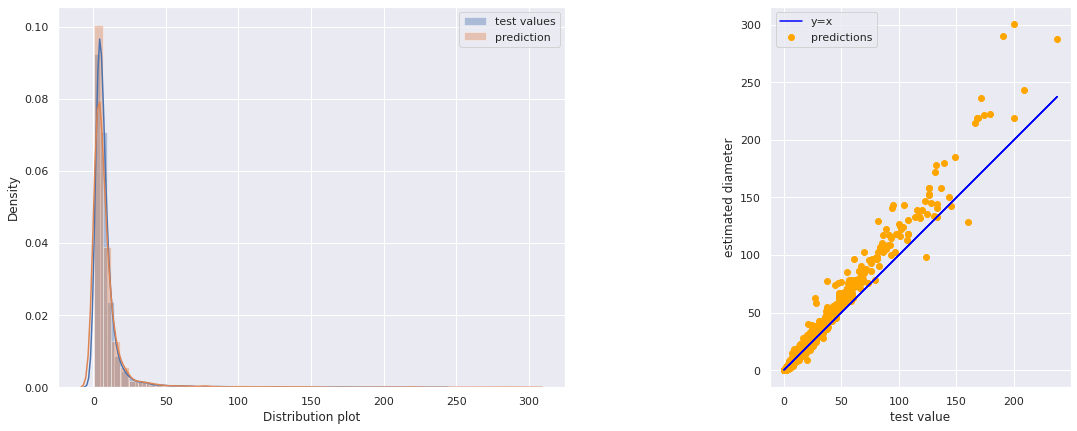

In [56]:
plot(Y_pred_forest)

Support Vector Machine regression

In [57]:
### Defining the model
from sklearn import svm
svmreg = svm.SVR()

### Training
svmreg.fit(X_train_norm,np.ravel(Y_train))

### Predicting
Y_pred_svm = svmreg.predict(X_test_norm)

### Scoring
score_svm = score(Y_pred_svm)
announce(score_svm)

algorithms.append('SVM')
scores.append(score_svm)

The R^2 score achieved using this regression is: 0.443


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


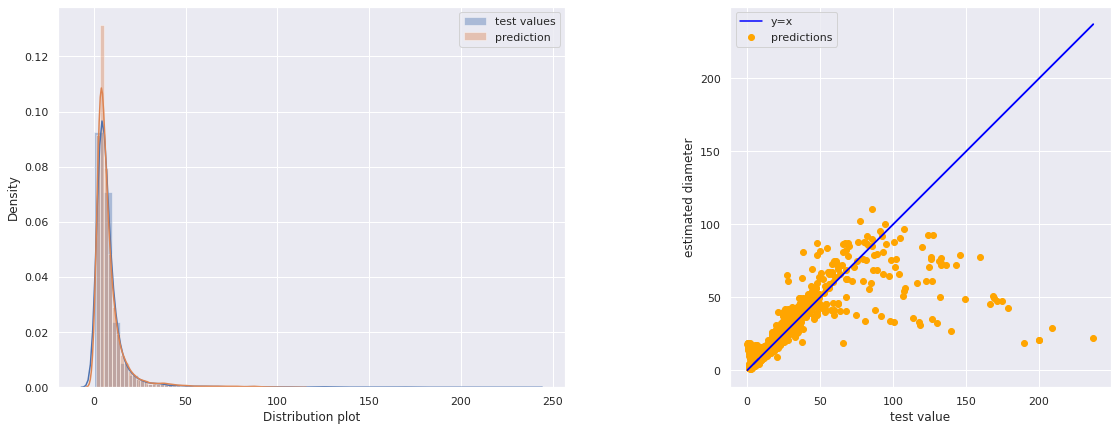

In [58]:
plot(Y_pred_svm)

XGBoost regression

In [59]:
### Defining the model
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test_norm)

### Scoring
score_xgb = score(Y_pred_xgb)
announce(score_xgb)

algorithms.append('XGB')
scores.append(score_xgb)

The R^2 score achieved using this regression is: 0.958


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


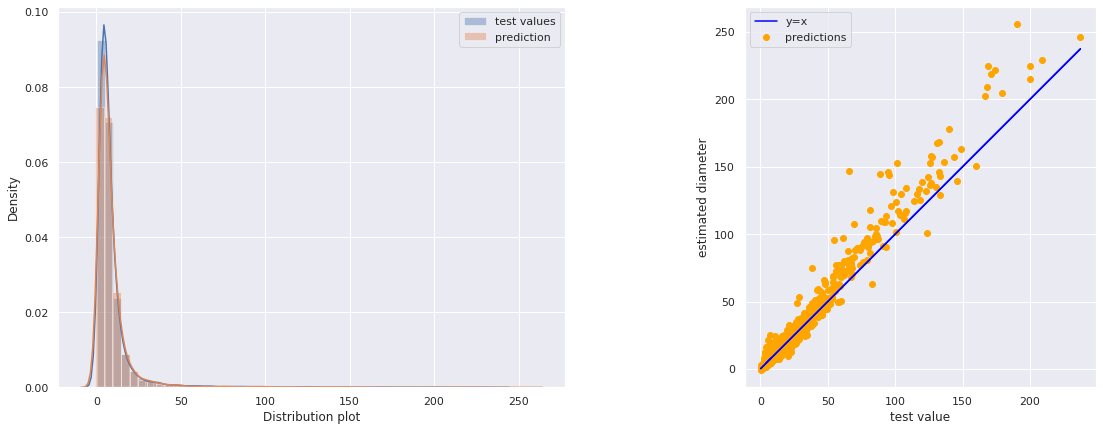

In [60]:
plot(Y_pred_xgb)

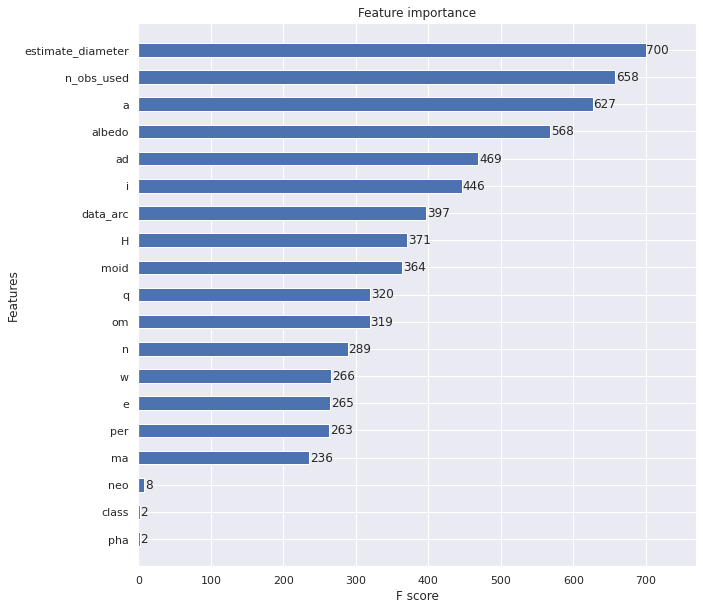

In [61]:
# One bonus of using xgboost is being able to 
# simply see how important the different features where when creating the learners.

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgReg, height=0.5, ax=ax, importance_type='weight')
plt.show()

Decision Tree

In [69]:
### Defining the model
from sklearn import tree
decTree = tree.DecisionTreeRegressor()

### Training
decTree = decTree.fit(X_train_norm,Y_train)

### Predicting
Y_pred_tree = decTree.predict(X_test_norm)

### Scoring
score_tree = score(Y_pred_tree)
announce(score_tree)

algorithms.append('DTree')
scores.append(score_tree)

The R^2 score achieved using this regression is: 0.937


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


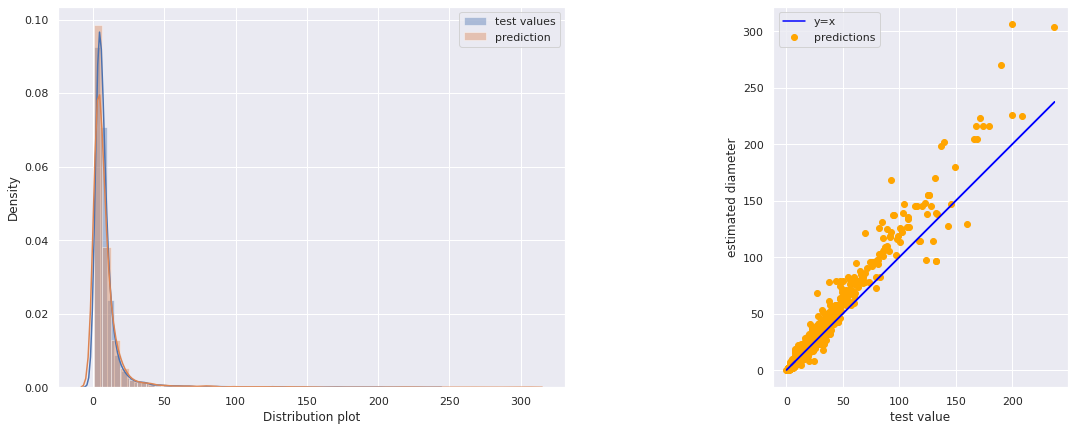

In [70]:
plot(Y_pred_tree)

Comparing all regression algorithms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


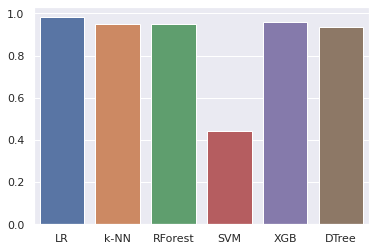

In [71]:
sns.barplot(algorithms,scores)